In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import  train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
df =  pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
print(len(df))
df.head()

299


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


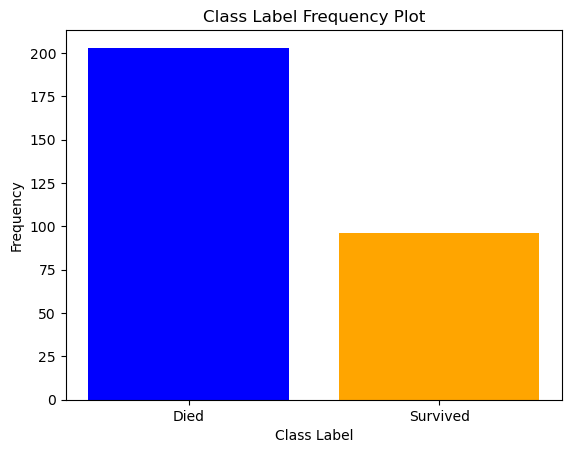

In [ ]:
class_label_counts = df['DEATH_EVENT'].value_counts()
plt.bar(['Died','Survived'], class_label_counts.values, color=['blue', 'orange'])

plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Label Frequency Plot')
plt.show()


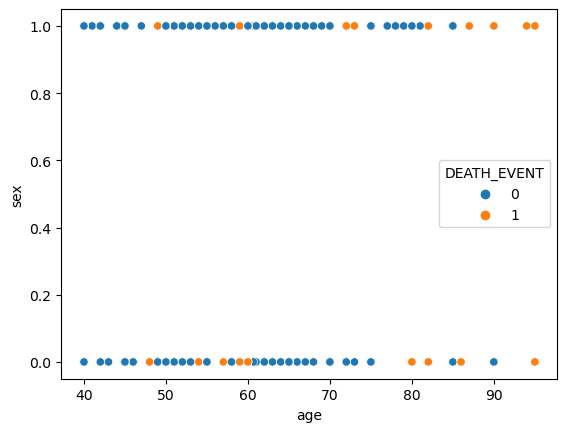

In [ ]:
sns.scatterplot(x='age', y='sex', data=df, hue='DEATH_EVENT')
plt.show()


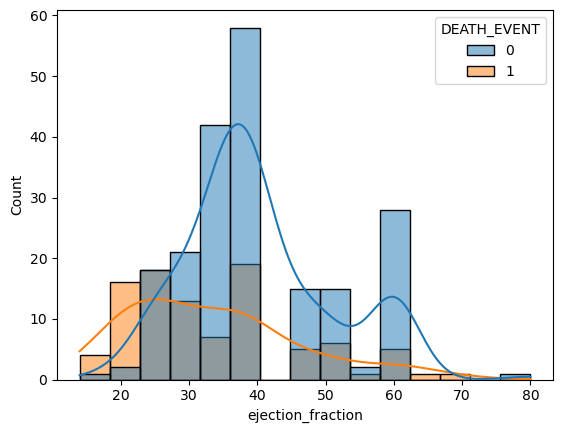

In [ ]:
sns.histplot(x='ejection_fraction', data=df, kde=True, hue='DEATH_EVENT')

plt.show()

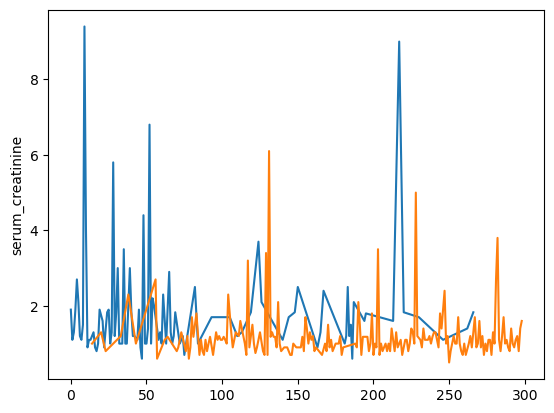

In [ ]:
d1 = df[df['DEATH_EVENT']==1]
d0 = df[df['DEATH_EVENT']==0]

sns.lineplot(d1['serum_creatinine'])
sns.lineplot(d0['serum_creatinine'])
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:12], df.iloc[:,12], test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=10)
param_grid = {
    'criterion': ['gini','entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
predicted = best_rf_model.predict(X_test)

Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        35
           1       0.80      0.48      0.60        25

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60

[[32  3]
 [13 12]]


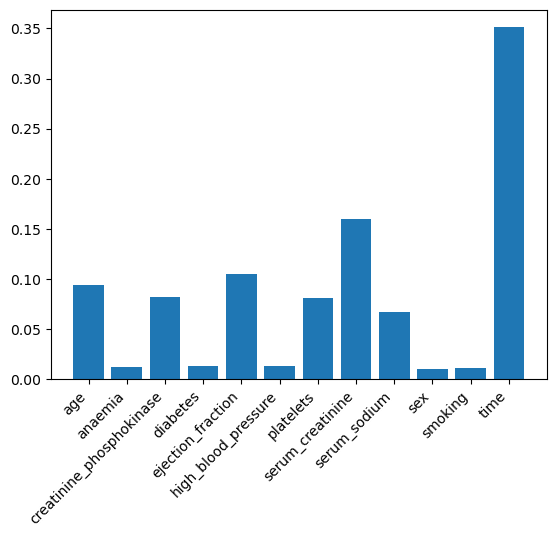

In [ ]:
feature_importances = best_rf_model.feature_importances_
plt.bar(df.iloc[:,0:12].columns,feature_importances )
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:11], df.iloc[:,12], test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=10)
param_grid = {
    'criterion': ['gini','entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
predicted = best_rf_model.predict(X_test)

Training Score:  0.7867021276595744
Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        35
           1       0.62      0.40      0.49        25

    accuracy                           0.65        60
   macro avg       0.64      0.61      0.61        60
weighted avg       0.64      0.65      0.63        60

[[29  6]
 [15 10]]


In [ ]:
dt = DecisionTreeClassifier(random_state=10)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_
predicted = best_dt_model.predict(X_test)

Training Score:  0.7485815602836878
Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

    accuracy                           0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60

[[31  4]
 [13 12]]


# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
dt = DecisionTreeClassifier(random_state=10)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_
predicted = best_dt_model.predict(X_test_scaled)

Training Score:  0.7485815602836878
Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

    accuracy                           0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60

[[31  4]
 [13 12]]


In [ ]:

lr= LogisticRegression(random_state=10)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_logreg_model = grid_search.best_estimator_
predicted = best_logreg_model.predict(X_test_scaled)

Training Score:  0.7656028368794326
Best Parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.63      0.91      0.74        35
           1       0.67      0.24      0.35        25

    accuracy                           0.63        60
   macro avg       0.65      0.58      0.55        60
weighted avg       0.64      0.63      0.58        60

[[32  3]
 [19  6]]


In [ ]:
nb_model = MultinomialNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_nb_model = grid_search.best_estimator_

predicted = best_nb_model.predict(X_test)

Training Score:  0.5684397163120568
Best Parameters:  {'alpha': 0.1}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.62      0.74      0.68        35
           1       0.50      0.36      0.42        25

    accuracy                           0.58        60
   macro avg       0.56      0.55      0.55        60
weighted avg       0.57      0.58      0.57        60

[[26  9]
 [16  9]]


In [ ]:
svc = svm.SVC(random_state=10)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_svc_model = grid_search.best_estimator_
predicted = best_svc_model.predict(X_test_scaled)

Training Score:  0.7906028368794326
Best Parameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.63      0.89      0.74        35
           1       0.64      0.28      0.39        25

    accuracy                           0.63        60
   macro avg       0.63      0.58      0.56        60
weighted avg       0.63      0.63      0.59        60

[[31  4]
 [18  7]]


In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1,20)
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_knn_model = grid_search.best_estimator_
predicted = best_knn_model.predict(X_test_scaled)


Training Score:  0.7156028368794327
Best Parameters:  {'n_neighbors': 13}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.61      0.97      0.75        35
           1       0.75      0.12      0.21        25

    accuracy                           0.62        60
   macro avg       0.68      0.55      0.48        60
weighted avg       0.67      0.62      0.52        60

[[34  1]
 [22  3]]


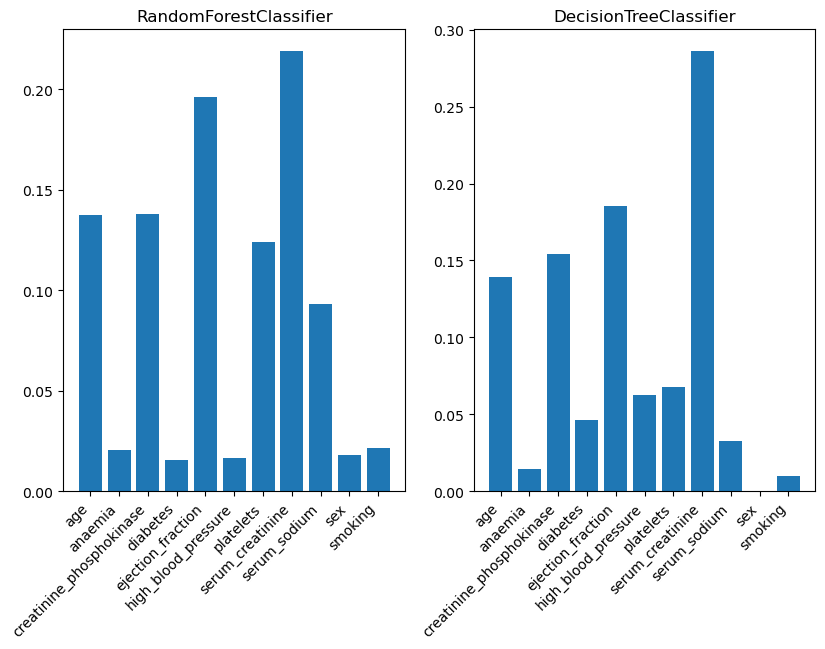

In [ ]:
plt.figure(figsize=(15, 6))

feature_importances = best_rf_model.feature_importances_
plt.subplot(1,3,1)
plt.title('RandomForestClassifier')
plt.bar(df.iloc[:,0:11].columns,feature_importances )
plt.xticks(rotation=45, ha='right')

feature_importances = best_dt_model.feature_importances_
plt.subplot(1,3,2)
plt.title('DecisionTreeClassifier')
plt.bar(df.iloc[:,0:11].columns,feature_importances )
plt.xticks(rotation=45, ha='right')

plt.show()

# Trying with selected features

In [ ]:
new_df = pd.concat([df.iloc[:,0], df.iloc[:,2], df.iloc[:,4], df.iloc[:,7]],axis=1)
X_train, X_test, y_train, y_test = train_test_split(new_df, df.iloc[:,12], test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier()
param_grid = {
    'criterion': ['gini','entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
predicted = best_rf_model.predict(X_test)

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.68      0.80      0.74        35
           1       0.63      0.48      0.55        25

    accuracy                           0.67        60
   macro avg       0.66      0.64      0.64        60
weighted avg       0.66      0.67      0.66        60

[[28  7]
 [13 12]]


In [ ]:
dt = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_
predicted = best_dt_model.predict(X_test)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.66      0.89      0.76        35
           1       0.69      0.36      0.47        25

    accuracy                           0.67        60
   macro avg       0.68      0.62      0.61        60
weighted avg       0.67      0.67      0.64        60

[[31  4]
 [16  9]]


In [ ]:
svc = svm.SVC()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_svc_model = grid_search.best_estimator_
predicted = best_svc_model.predict(X_test_scaled)

Best Parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        35
           1       0.69      0.44      0.54        25

    accuracy                           0.68        60
   macro avg       0.68      0.65      0.65        60
weighted avg       0.68      0.68      0.67        60

[[30  5]
 [14 11]]


In [ ]:

lr= LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_logreg_model = grid_search.best_estimator_
predicted = best_logreg_model.predict(X_test_scaled)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.63      0.89      0.74        35
           1       0.64      0.28      0.39        25

    accuracy                           0.63        60
   macro avg       0.63      0.58      0.56        60
weighted avg       0.63      0.63      0.59        60

[[31  4]
 [18  7]]


In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1,20)
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_knn_model = grid_search.best_estimator_
predicted = best_knn_model.predict(X_test_scaled)


Best Parameters:  {'n_neighbors': 9}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.64      0.86      0.73        35
           1       0.62      0.32      0.42        25

    accuracy                           0.63        60
   macro avg       0.63      0.59      0.58        60
weighted avg       0.63      0.63      0.60        60

[[30  5]
 [17  8]]


In [ ]:
nb_model = MultinomialNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

best_nb_model = grid_search.best_estimator_

predicted = best_nb_model.predict(X_test)

Best Parameters:  {'alpha': 0.1}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.64      0.83      0.73        35
           1       0.60      0.36      0.45        25

    accuracy                           0.63        60
   macro avg       0.62      0.59      0.59        60
weighted avg       0.63      0.63      0.61        60

[[29  6]
 [16  9]]


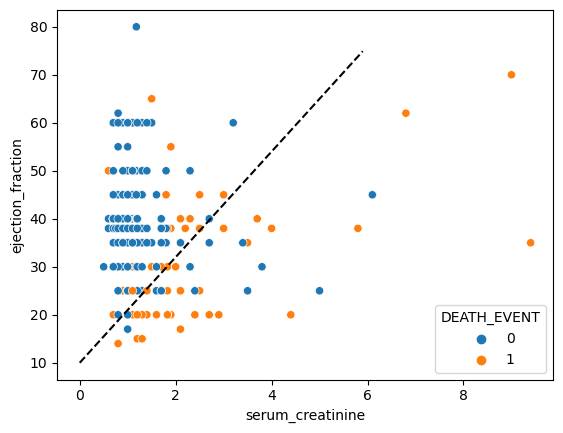

In [ ]:
x=np.arange(0,6,0.1)
y= 11*x +10

sns.scatterplot(x='serum_creatinine', y='ejection_fraction', data=df, hue='DEATH_EVENT')
plt.plot(x,y,'k', linestyle='dashed')
plt.show()


# SMOTE upsampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:11], df.iloc[:,12], test_size=0.2, random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:

dt = DecisionTreeClassifier(random_state=10)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_
predicted = best_dt_model.predict(X_test)

Training Score:  0.7621597892888499
Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60

[[30  5]
 [10 15]]


In [ ]:
nb_model = MultinomialNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_nb_model = grid_search.best_estimator_

predicted = best_nb_model.predict(X_test)

Training Score:  0.5475417032484635
Best Parameters:  {'alpha': 0.1}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.63      0.74      0.68        35
           1       0.53      0.40      0.45        25

    accuracy                           0.60        60
   macro avg       0.58      0.57      0.57        60
weighted avg       0.59      0.60      0.59        60

[[26  9]
 [15 10]]


In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svc = svm.SVC(random_state=10)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_svc_model = grid_search.best_estimator_
predicted = best_svc_model.predict(X_test_scaled)

Training Score:  0.7769095697980684
Best Parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        35
           1       0.79      0.44      0.56        25

    accuracy                           0.72        60
   macro avg       0.74      0.68      0.68        60
weighted avg       0.73      0.72      0.70        60

[[32  3]
 [14 11]]


In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1,20)
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
print('Training Score: ',grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

best_knn_model = grid_search.best_estimator_
predicted = best_knn_model.predict(X_test_scaled)


Training Score:  0.747190517998244
Best Parameters:  {'n_neighbors': 9}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        35
           1       0.62      0.40      0.49        25

    accuracy                           0.65        60
   macro avg       0.64      0.61      0.61        60
weighted avg       0.64      0.65      0.63        60

[[29  6]
 [15 10]]


# PCA

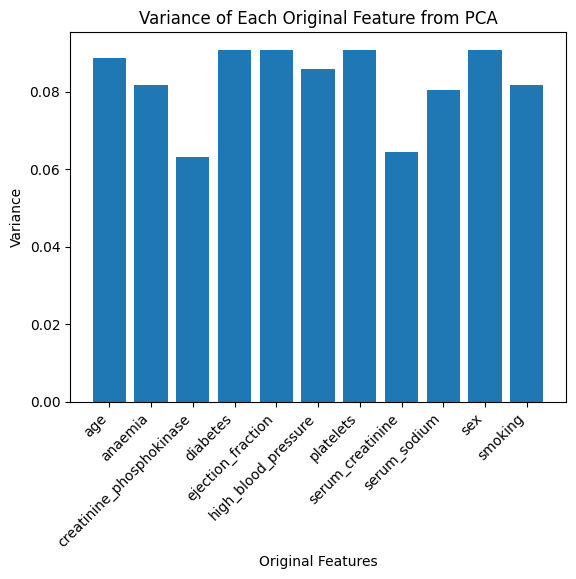

In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:11])

pca = PCA()
X_train_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_scaled)

feature_variances = pca.components_.var(axis=0)

plt.bar(df.iloc[:,:11].columns, feature_variances)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Original Features')
plt.ylabel('Variance')
plt.title('Variance of Each Original Feature from PCA')
plt.show()

In [ ]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:

dt = DecisionTreeClassifier(random_state=10)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=StratifiedKFold(5).split(X_train, y_train), scoring='accuracy')

grid_search.fit(X_train_pca, y_train)
print('Training Score: ',grid_search.best_score_)

print("Best Parameters: ", grid_search.best_params_)

best_dt_model = grid_search.best_estimator_
predicted = best_dt_model.predict(X_test_pca)

Training Score:  0.6607211538461538
Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
print('\n ##### Classification Report ##### \n')
print(classification_report(y_test, predicted ))

print(confusion_matrix(y_test, predicted))


 ##### Classification Report ##### 

              precision    recall  f1-score   support

           0       0.64      0.66      0.65        41
           1       0.65      0.63      0.64        41

    accuracy                           0.65        82
   macro avg       0.65      0.65      0.65        82
weighted avg       0.65      0.65      0.65        82

[[27 14]
 [15 26]]
